In [57]:
# Imports
%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (9.0, 5.0)
import numpy as np
from IPython.html.widgets import interactive
from IPython.display import display, Audio
from scipy import signal
import matplotlib.pyplot as plt,mpld3
mpld3.enable_notebook()

## OFDM Python Lab
The lab objective is to model OFDM signaling and reception

### Step 1: Create Array of Constellation Points

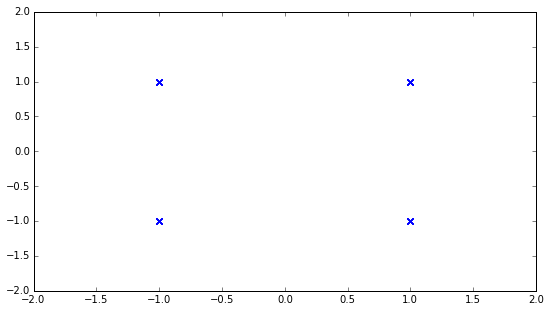

In [58]:
symbol_length = 256

# constellation array
x_real = np.round(np.random.rand(symbol_length))*2-1
x_imag = np.round(np.random.rand(symbol_length))*2-1
x = x_real + 1j*x_imag

# plot points
plt.figure(1)
plt.plot(x_real,x_imag,'x')
plt.axis([-2,2,-2,2]);

### Step 2: Modulate OFDM Subcarriers
Modulation is as simple as taking a IFFT of the constellation point array.

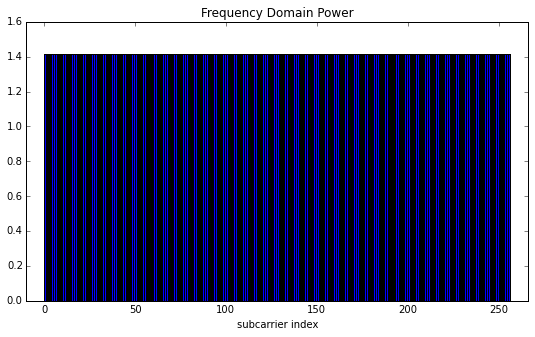

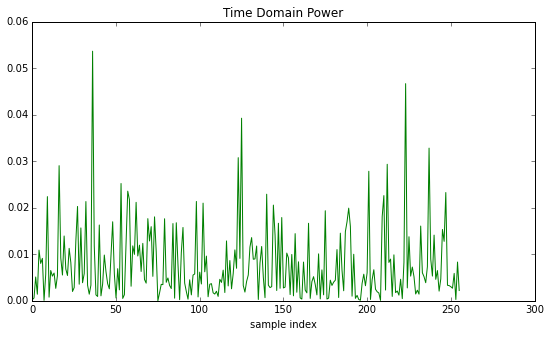

In [59]:
# Create time-domain symbol
y_no_cp = np.fft.ifft(x)

plt.figure(1)
plt.bar(range(x.size),abs(x));
plt.xlabel('subcarrier index');
plt.title('Frequency Domain Power');
plt.xlim([-10,symbol_length+10])

plt.figure(2)
plt.plot(abs(y_no_cp)**2,'g');
plt.xlabel('sample index');
plt.title('Time Domain Power');

### Step 3: Add Cyclic Prefix

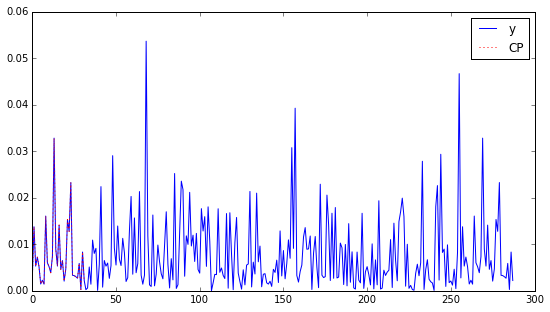

In [60]:
# CP length
L = 32

y = np.hstack([y_no_cp[-L:],y_no_cp])

plt.plot(abs(y)**2,label = "y");
plt.plot(abs(y_no_cp[-L:])**2,'r:',label="CP");
plt.legend();

### Step 4: Send Through MP Channel

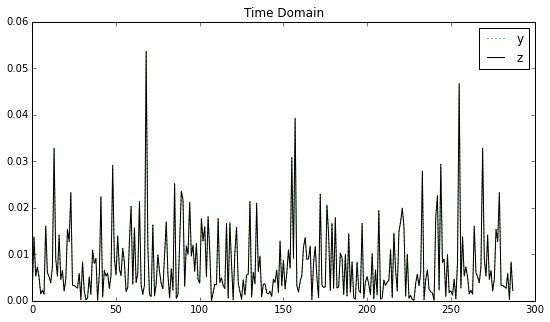

In [65]:
def create_channel(L = 15, alpha = 0.8, do_plots = False):  # add arguments and default values
    '''
    Creates and optionally plots a random channel impulse response
    
    Inputs:
    L = channel length
    alpha = channel falloff
    do_plots = boolean to indicate whether to plot 
    
    Output:
    channel impulse response
    '''
    h_non_exponential = np.random.randn(L) + 1j*np.random.randn(L)

    power_val = np.arange(L)

    amplitude_envelope = np.sqrt(np.power(alpha,power_val))

    h = h_non_exponential*amplitude_envelope
    h = h/np.linalg.norm(h)

    if do_plots:
        plt.figure(1)
        plt.stem(abs(h))
        plt.xlim([-.5,L+.5])

        NFFT = 512

        # Calculate DFT
        spectrum = np.fft.fft(h,NFFT)

        # DFT frequencies
        freq = np.fft.fftfreq(NFFT)

        # spectrum.size
        # plot FFT
        plt.figure(2)
        plt.plot(freq*2,abs(spectrum), 'b.');
        plt.ylabel('Power [dB]');
        plt.xlabel('Frequency [Hz]');
        plt.grid(True)
    
    return h

# Create channel
h = create_channel(L=1)

# Convolve symbol with channel
z = np.convolve(h,y,mode='same')

plt.figure(1)
plt.plot(abs(y)**2,'g:',label = "y");
plt.plot(abs(z)**2,'k',label = "z");
plt.legend();
plt.title("Time Domain");

### Step 5: Add Noise (This is the Received Signal)

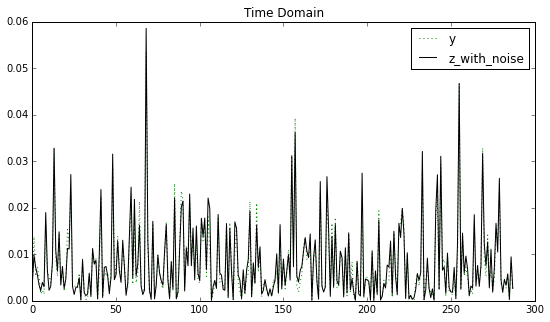

In [66]:
# create noise
noise_power = .0001
noise_signal = np.random.randn(symbol_length + L) + 1j*np.random.randn(symbol_length + L)

# add noise
z_with_noise = z + np.sqrt(noise_power)*noise_signal

plt.figure(1)
plt.plot(abs(y)**2,'g:',label = "y");
plt.plot(abs(z_with_noise)**2,'k',label = "z_with_noise");
plt.legend();
plt.title("Time Domain");

### Step 6: Drop CP

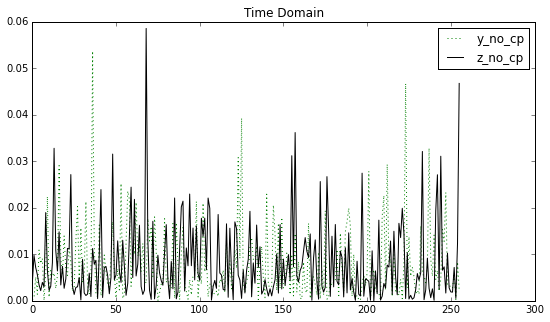

In [67]:
z_no_cp = z_with_noise[:symbol_length]

plt.figure(1)
plt.plot(abs(y_no_cp)**2,'g:',label = "y_no_cp");
plt.plot(abs(z_no_cp)**2,'k',label = "z_no_cp");
plt.legend();
plt.title("Time Domain");

### Step 7: Convert to Frequency Domain

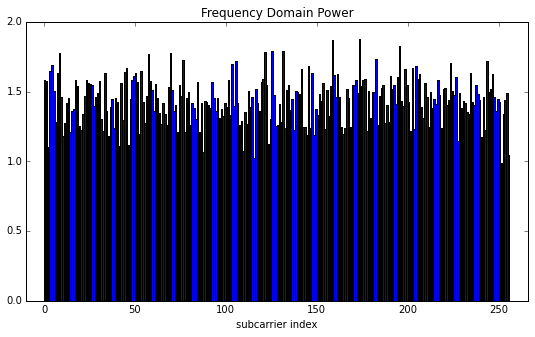

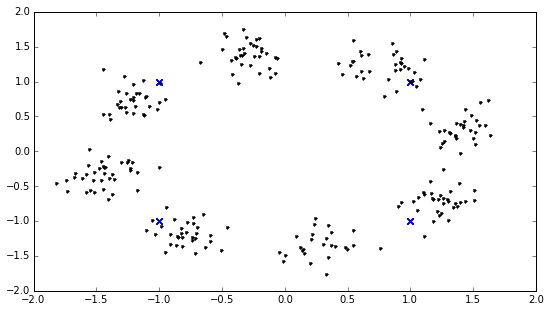

In [68]:
# Create time-domain symbol
x_hat = np.fft.fft(z_no_cp)

plt.figure(1)
plt.bar(range(x_hat.size),abs(x_hat));
plt.xlabel('subcarrier index');
plt.title('Frequency Domain Power');
plt.xlim([-10,symbol_length+10])


plt.figure(2)
plt.plot(x_real,x_imag,'x')
plt.axis([-2,2,-2,2]);
plt.plot(np.real(x_hat),np.imag(x_hat),'k.')
plt.axis([-2,2,-2,2]);
